<a href="https://colab.research.google.com/github/kanikaKanu90/notebook/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [ ]:
(train_images, train_labels) , (test_images, test_labels) = mnist.load_data()

train_images.shape

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

In [ ]:
type(train_images)

numpy.ndarray

In [ ]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
train_images = train_images.reshape(60000, 28, 28, 1)
train_images = train_images.astype('float32') # /255


test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images.astype('float32')

In [ ]:
train_images[0]

In [ ]:
train_labels[0], train_labels.shape, train_labels[0].shape

(5, (60000,), ())

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
import numpy as np

np.argmax(train_labels) # class with highest probability

4

In [ ]:
train_labels = to_categorical(train_labels) #binary matrix
test_labels = to_categorical(test_labels)

In [ ]:
train_labels[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [ ]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10, batch_size=64)

Epoch 1/10
938/938 [==============================] - 48s 51ms/step - loss: 0.0414 - accuracy: 0.9907
Epoch 2/10
938/938 [==============================] - 47s 50ms/step - loss: 0.0398 - accuracy: 0.9905
Epoch 3/10
938/938 [==============================] - 50s 53ms/step - loss: 0.0385 - accuracy: 0.9916
Epoch 4/10
938/938 [==============================] - 49s 52ms/step - loss: 0.0431 - accuracy: 0.9910
Epoch 5/10
938/938 [==============================] - 49s 53ms/step - loss: 0.0427 - accuracy: 0.9919
Epoch 6/10
938/938 [==============================] - 49s 53ms/step - loss: 0.0425 - accuracy: 0.9917
Epoch 7/10
938/938 [==============================] - 49s 53ms/step - loss: 0.0405 - accuracy: 0.9919
Epoch 8/10
938/938 [==============================] - 50s 53ms/step - loss: 0.0450 - accuracy: 0.9923
Epoch 9/10
938/938 [==============================] - 50s 54ms/step - loss: 0.0477 - accuracy: 0.9921
Epoch 10/10
938/938 [==============================] - 55s 59ms/step - loss: 0.041

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

In [5]:
img_path = '/content/sample_data/45.jpg'

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
#  Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

(1, 150, 150, 3)


In [ ]:
img_tensor

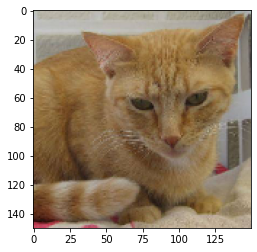

In [6]:


import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [8]:
from keras import  models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])


In [9]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

activation_model

In [10]:
activations = activation_model.predict(img_tensor)

In [11]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)


(1, 148, 148, 32)


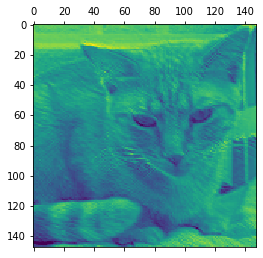

In [12]:
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

# This channel appears to encode a diagonal edge detector.

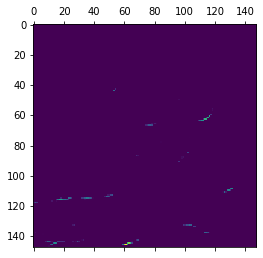

In [13]:
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


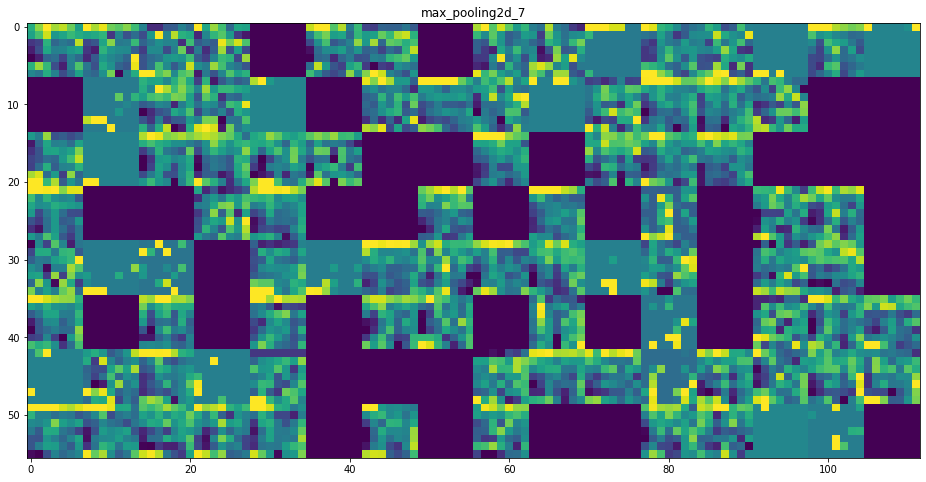

In [15]:
layer_names = []
for layer in model.layers[:8]:
  layer_names.append(layer.name)
  
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
  n_features = layer_activation.shape[-1]
  size = layer_activation.shape[1]
  n_cols = n_features // images_per_row
  display_grid = np.zeros((size * n_cols, images_per_row * size))
  for col in range(n_cols):
    for row in range(images_per_row):
      channel_image = layer_activation[0,
      :, :,
      col * images_per_row + row]
      channel_image -= channel_image.mean() 
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8')
      display_grid[col * size : (col + 1) * size,
      row * size : (row + 1) * size] = channel_image
scale = 1. / size
plt.figure(figsize=(scale * display_grid.shape[1],
scale * display_grid.shape[0]))
plt.title(layer_name)
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='viridis')